In [62]:
import pandas as pd
import os
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.io import wavfile
%matplotlib inline

In [63]:
data_path = r"E:\personal\LiveProjects\speech_recognition\google_speech_new\google_speech\train"

train_csv = os.path.join(data_path, r"train.csv")
df = pd.read_csv(train_csv, encoding='utf-8')


In [64]:
audio_path = os.path.join(data_path, os.path.join(r"audio", df.iloc[1]['file_path']))
print(audio_path)
ipd.Audio(audio_path, autoplay=True)

E:\personal\LiveProjects\speech_recognition\google_speech_new\google_speech\train\audio\bed/00f0204f_nohash_1.wav


In [65]:
print(df)

                        file_path label              file_name
0       bed/00f0204f_nohash_0.wav   bed  00f0204f_nohash_0.wav
1       bed/00f0204f_nohash_1.wav   bed  00f0204f_nohash_1.wav
2       bed/0a7c2a8d_nohash_0.wav   bed  0a7c2a8d_nohash_0.wav
3       bed/0b09edd3_nohash_0.wav   bed  0b09edd3_nohash_0.wav
4       bed/0b56bcfe_nohash_0.wav   bed  0b56bcfe_nohash_0.wav
...                           ...   ...                    ...
51083  zero/ffd2ba2f_nohash_1.wav  zero  ffd2ba2f_nohash_1.wav
51084  zero/ffd2ba2f_nohash_2.wav  zero  ffd2ba2f_nohash_2.wav
51085  zero/ffd2ba2f_nohash_3.wav  zero  ffd2ba2f_nohash_3.wav
51086  zero/ffd2ba2f_nohash_4.wav  zero  ffd2ba2f_nohash_4.wav
51087  zero/fffcabd1_nohash_0.wav  zero  fffcabd1_nohash_0.wav

[51088 rows x 3 columns]


In [66]:

# Read one of the voice command clips using scipy.
samplerate, data = wavfile.read(audio_path)

# the array of samples and sampling rate.
print(f"sample rate = {samplerate}")
print(f"raw data = {data}")
print(f"raw data shape = {data.shape}")
#print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")

sample rate = 16000
raw data = [-12 -15 -15 ...  30  16  22]
raw data shape = (16000,)
length = 1.0s


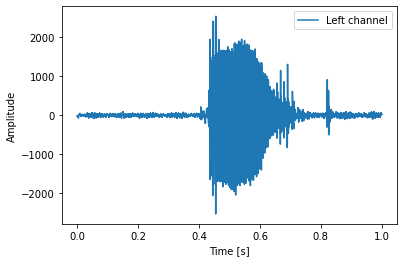

In [67]:

# Visualize the entire clip 
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="Left channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

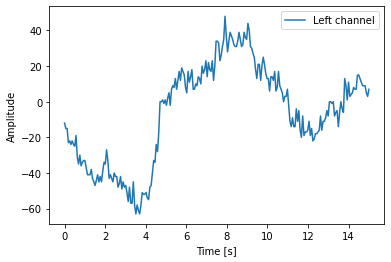

In [68]:
# Visualize a segment of 15 milliseconds
samples_15ms = int((samplerate * 15) / 1000)
length_15ms = 0.015
time_15ms = np.linspace(0., 15, samples_15ms)
plt.plot(time_15ms, data[0 : samples_15ms], label="Left channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

sample rate = 22050
raw data = [-0.00036606 -0.00048394 -0.00040867 ...  0.00054135  0.00061212
  0.00054082]
raw data shape = (22050,)
length = 1.0s


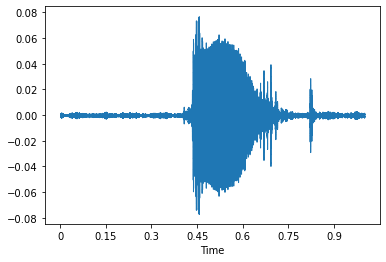

In [69]:
# Use librosa to load an audio clip from the dataset.

data, samplerate = librosa.load(audio_path)
print(f"sample rate = {samplerate}")
print(f"raw data = {data}")
print(f"raw data shape = {data.shape}")
#print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")

librosa.display.waveshow(data, sr=samplerate)

In [70]:
sr = np.array([0],dtype=np.int32)
sr.resize(51088)

nSamples = np.array([0],dtype=np.int32)
nSamples.resize(51088)

dur = np.array([0.0],dtype=np.float64)
dur.resize(51088)

first_sample_rate = -1;
inconsistent_sample_rate = False

for ind in df.index:
    fp = df.loc[ind, "file_path"]
    audio_path = os.path.join(data_path, os.path.join(r"audio", fp))
    #print(audio_path)
    data, samplerate = librosa.load(audio_path, sr=None)
    #print(samplerate)
    duration = librosa.get_duration(y=data, sr=samplerate)
    #print(duration)
    #print(data.shape[0])

    sr[ind] = samplerate
    nSamples[ind] = data.shape[0]
    dur[ind] = duration
    
    if first_sample_rate == -1:
        first_sample_rate = samplerate
    else:
        if samplerate != first_sample_rate:
            inconsistent_sample_rate = True

if inconsistent_sample_rate == True:
    print("Sample rates found inconsistent")
else:
    print("Sample rates found consistent")

Sample rates found consistent


In [71]:
df["sample_rate"] = sr
df["number_of_samples"] = nSamples
df["duration"] = dur
print(df)

                        file_path label              file_name  sample_rate  \
0       bed/00f0204f_nohash_0.wav   bed  00f0204f_nohash_0.wav        16000   
1       bed/00f0204f_nohash_1.wav   bed  00f0204f_nohash_1.wav        16000   
2       bed/0a7c2a8d_nohash_0.wav   bed  0a7c2a8d_nohash_0.wav        16000   
3       bed/0b09edd3_nohash_0.wav   bed  0b09edd3_nohash_0.wav        16000   
4       bed/0b56bcfe_nohash_0.wav   bed  0b56bcfe_nohash_0.wav        16000   
...                           ...   ...                    ...          ...   
51083  zero/ffd2ba2f_nohash_1.wav  zero  ffd2ba2f_nohash_1.wav        16000   
51084  zero/ffd2ba2f_nohash_2.wav  zero  ffd2ba2f_nohash_2.wav        16000   
51085  zero/ffd2ba2f_nohash_3.wav  zero  ffd2ba2f_nohash_3.wav        16000   
51086  zero/ffd2ba2f_nohash_4.wav  zero  ffd2ba2f_nohash_4.wav        16000   
51087  zero/fffcabd1_nohash_0.wav  zero  fffcabd1_nohash_0.wav        16000   

       number_of_samples  duration  
0             

In [72]:
df.describe()

,sample_rate,number_of_samples,duration
count,51088.0,51088.000000,51088.000000
mean,16000.0,15746.260942,0.984141
std,0.0,961.965047,0.060123
min,16000.0,5945.000000,0.371563
25%,16000.0,16000.000000,1.000000
50%,16000.0,16000.000000,1.000000
75%,16000.0,16000.000000,1.000000
max,16000.0,16000.000000,1.000000


(array([8.0000e+00, 1.7000e+01, 1.2600e+02, 1.3100e+02, 3.1800e+02,
        5.4800e+02, 7.9100e+02, 6.5600e+02, 1.1260e+03, 4.7367e+04]),
 array([0.3715625 , 0.43440625, 0.49725   , 0.56009375, 0.6229375 ,
        0.68578125, 0.748625  , 0.81146875, 0.8743125 , 0.93715625,
        1.        ]),
 <a list of 10 Patch objects>)

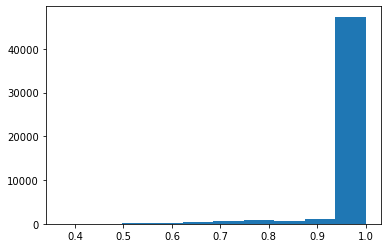

In [73]:

plt.hist(df["duration"])

(array([8.0000e+00, 1.7000e+01, 1.2600e+02, 1.3100e+02, 3.1800e+02,
        5.4800e+02, 7.9100e+02, 6.5600e+02, 1.1260e+03, 4.7367e+04]),
 array([ 5945. ,  6950.5,  7956. ,  8961.5,  9967. , 10972.5, 11978. ,
        12983.5, 13989. , 14994.5, 16000. ]),
 <a list of 10 Patch objects>)

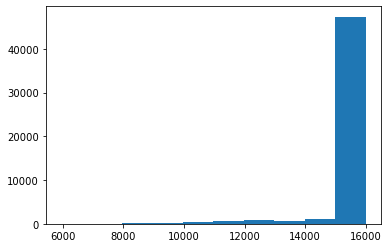

In [74]:
plt.hist(df["number_of_samples"])

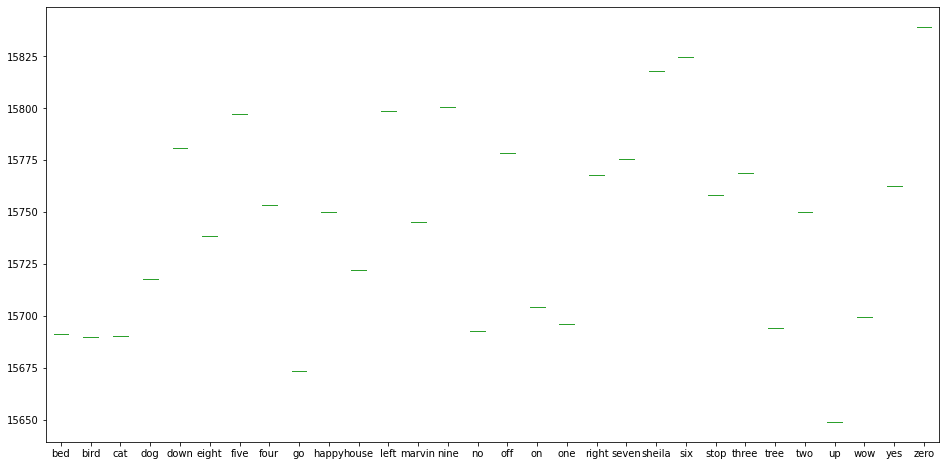

In [75]:
pivots = df.pivot_table(columns='label', values='number_of_samples')#.sort_values(ascending=False)
pivots.plot(kind='box', figsize=[16,8])

In [76]:
labels = df["label"].unique()
views = []

for label in labels:
    view = df.loc[df.label==label, 'number_of_samples']
    view1 = df.loc[df.label==label, 'duration']
    views.append([label, view, view1])
len(views)

#plt.tight_layout()
#for view in views:
#    plt.hist(view[1], label=view[0])

30

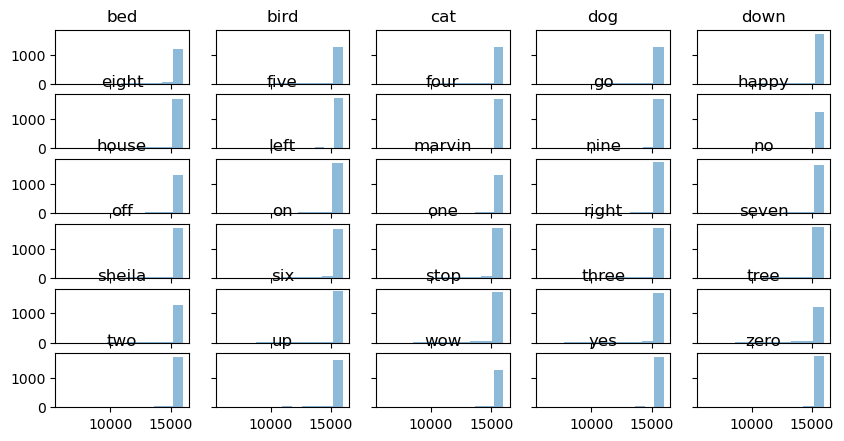

In [81]:

fig, axes = plt.subplots(6, 5, figsize=(10,5), dpi=100, sharex=True, sharey=True)
for i, (ax, view) in enumerate(zip(axes.flatten(), views)):
    ax.hist(view[1], alpha=0.5, label=view[0])
    ax.set_title(view[0])


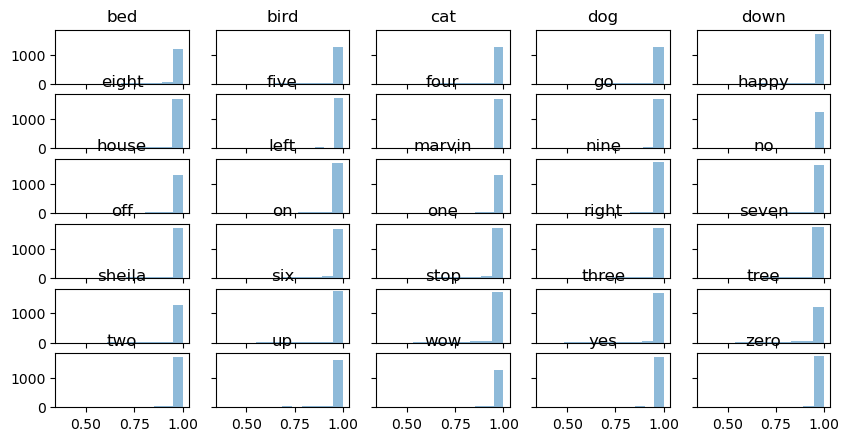

In [82]:
fig, axes = plt.subplots(6, 5, figsize=(10,5), dpi=100, sharex=True, sharey=True)
for i, (ax, view) in enumerate(zip(axes.flatten(), views)):
    ax.hist(view[2], alpha=0.5, label=view[0])
    ax.set_title(view[0])

In [137]:
# Uniform length of audio clips
def make_1s_duration(data, duration):
    return librosa.effects.time_stretch(data, duration)

fp = df.loc[df.duration == df.duration.min()]
print(fp)
audio_path_min_duration = os.path.join(data_path, os.path.join(r"audio", "seven/99081f4d_nohash_3.wav"))
data, samplerate = librosa.load(audio_path_min_duration, sr=None)
print(data.shape)
duration = librosa.get_duration(y=data, sr=samplerate)
print(duration)
data_stretch = make_1s_duration(data, duration)
print(data_stretch.shape)
duration_stretch = librosa.get_duration(y=data_stretch, sr=samplerate)
print(duration_stretch)

                         file_path  label              file_name  sample_rate  \
33083  seven/99081f4d_nohash_3.wav  seven  99081f4d_nohash_3.wav        16000   

       number_of_samples  duration  
33083               5945  0.371563  
(5945,)
0.3715625
(16000,)
1.0


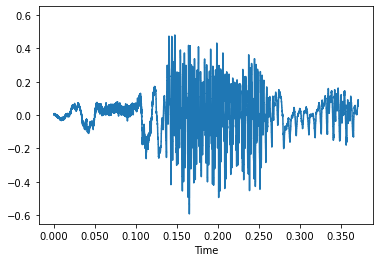

In [138]:
librosa.display.waveshow(data, sr=samplerate)

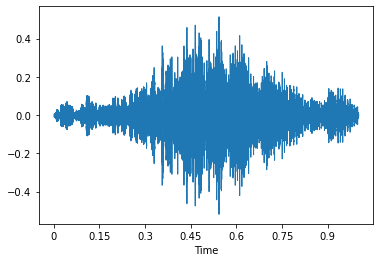

In [139]:
librosa.display.waveshow(data_stretch, sr=samplerate)

In [141]:
ipd.Audio(data=data, rate=samplerate)

In [142]:
ipd.Audio(data=data_stretch, rate=samplerate)